In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv(r'C:\Users\eev\Documents\Udacity\archive\survey_results_public.csv')

In [3]:
df.shape

(51392, 154)

In [4]:
# 1 Business Understanding

# This Use Case is made for this Course, but to clarify. This Data is conducted by StackOverflow to gather Information from People all over the World
# its covering information about the Jobs what languages they programm in and even the Job sattisfaction.
# my interest is to see if the Satisfaction depends on the income and on the experience (time) they work in the field
# also i wanna know if the gender actually plays a role
# and at last i wanna see what countries make the most and if its related to what countries think they make the worst income

In [5]:
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,...,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,...,Once or twice,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,At least once each day,At least once each day,Disagree,Disagree,Strongly disagree,Strongly agree,Agree,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,14 to 15 years,9 to 10 years,NaN,NaN,NaN,NaN,Data scientist,6.0,3.0,NaN,NaN,NaN,NaN,NaN,...,At least once each week,Several times,At least once each week,Several times,At least once each week,Several times,At least once each day,At least once each day,Agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",20 or more years,10 to 11 years,NaN,Mobile developer; Graphics programming; Deskto...,NaN,NaN,NaN,6.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
#This way i will see all The titles for the data i have and can see what i want/need to use for my analysis
print(df.columns.tolist())

['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation', '

In [7]:
# 2 Data Understanding
# I will be needing following Infos for the Thesis:
# Salary,  Country, Gender, YearsProgram, Overpaid
# This Info will supply the basis, i might need to shape those (for example an average score) and extrude missing values since they fake the analysis

In [8]:
# 3 Data Preparation
# Here i clean the Data for the Reasearch i want to do aka the values i already defined before
# Thats pretty much it, the only thing i could do is dropping the rest of the values to minimize the data and only use data i actually need to make everything go faster
# the Reason i need to drop the missing Values is to secure the accuracy of the data sinced i get weirtd values with the included
df = df.dropna(subset=['YearsProgram', 'Gender', 'Salary', 'Country', 'Overpaid'])
df = df[['YearsProgram', 'Gender', 'Salary', 'Country','Overpaid']]
print(df.columns.tolist()) #to check if it worked

['YearsProgram', 'Gender', 'Salary', 'Country', 'Overpaid']


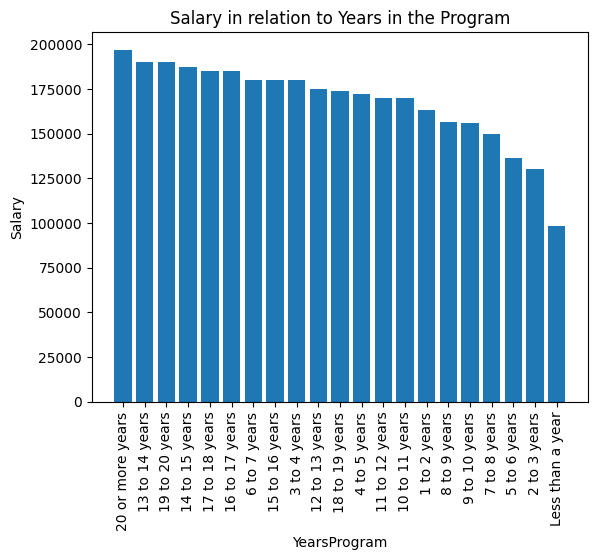

In [15]:
# 4. Modeling
# Now that i prepared my data i can start with the modeling for the user
# first i sort the values descending based on the average salary
df = df.sort_values(by='Salary', ascending=False)

plt.bar(df['YearsProgram'], df['Salary'])
plt.title('Salary in relation to Years in the Program')
plt.xlabel('YearsProgram')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [10]:
# ok like i thought years in the field influence the results of the Salary, now im interested if gender play a role
# now i will look into the gender and see how pay relates to this information
# first as values then in a bar chart combined with the information before

gender_salary_avg = df.groupby('Gender')['Salary'].mean()
gender_salary_avg_sorted = gender_salary_avg.sort_values(ascending=False)
print(gender_salary_avg_sorted)

Gender
Female; Transgender; Other                                 126000.000000
Female; Transgender; Gender non-conforming                  90750.000000
Transgender                                                 87643.985215
Male; Transgender                                           82033.030303
Female; Transgender                                         78791.988363
Female; Gender non-conforming                               69519.757125
Male; Transgender; Other                                    67500.000000
Male; Gender non-conforming; Other                          66000.000000
Gender non-conforming                                       63672.172798
Male; Gender non-conforming                                 60440.697719
Female                                                      58175.177258
Other                                                       58133.780908
Male                                                        57023.870261
Transgender; Gender non-conforming          

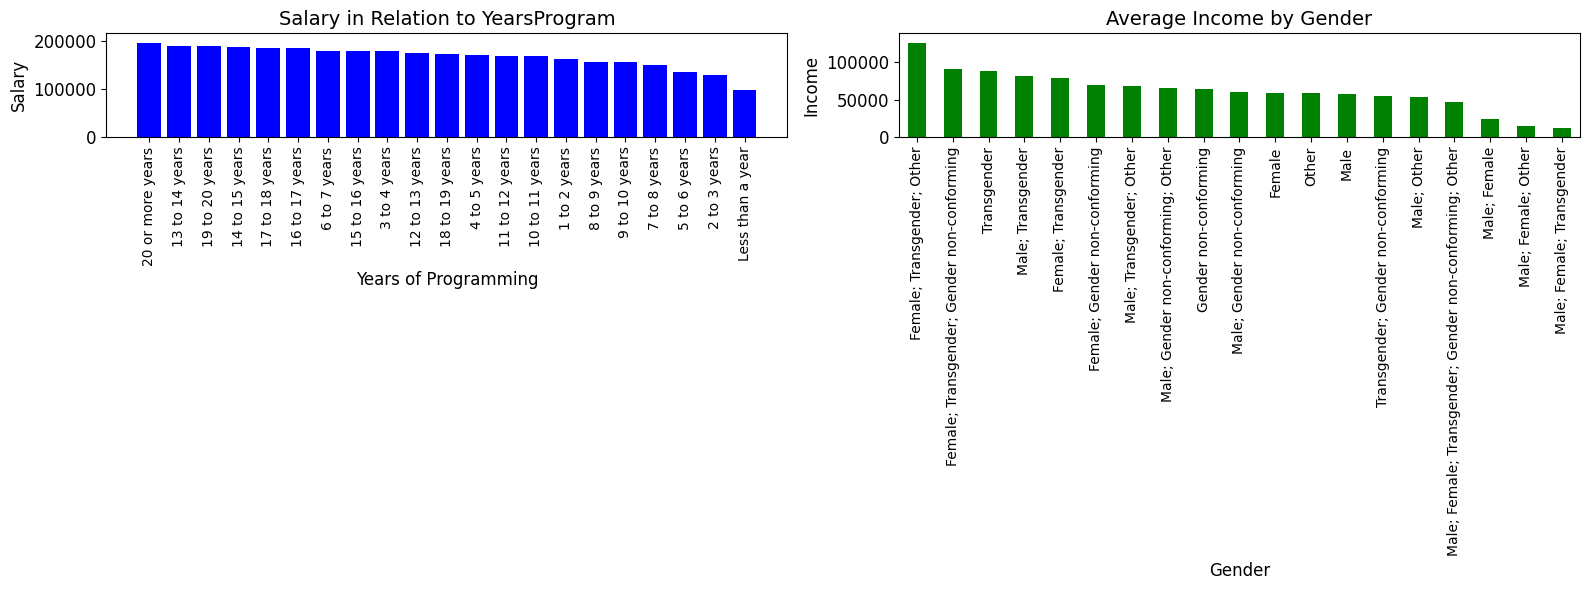

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Wider figure for better readability

# Salary vs. YearsProgram (Sorted)
df_sorted = df.sort_values(by='Salary', ascending=False)
axes[0].bar(df_sorted['YearsProgram'], df_sorted['Salary'], color='blue')
axes[0].set_title('Salary in Relation to YearsProgram', fontsize=14)
axes[0].set_xlabel('Years of Programming', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)
axes[0].tick_params(axis='y', labelsize=12)  # Make y-axis labels bigger

# Adjust y-axis limits (optional)
axes[0].set_ylim(0, df_sorted['Salary'].max() * 1.1)  # Adds 10% space above max value

# Average Income per Gender (Sorted)
gender_salary_avg_sorted.plot(kind='bar', color='green', ax=axes[1])
axes[1].set_title('Average Income by Gender', fontsize=14)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Income', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', labelsize=12)  # Make y-axis labels bigger

# Adjust y-axis limits (optional)
axes[1].set_ylim(0, gender_salary_avg_sorted.max() * 1.1)  # Adds 10% space above max value

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [12]:
# This part im not the happiest about, i coudl only choose between a small y axis where i cant see everything propably
# or make a bigger one but i cant read the legend of the x achsis. normally i would rename the column values to a shorter format and make a legend somewhere but for this purpose its enough

# Interesting, Female Transgender dominate thew graph and jump to the first place by around 35 Thousand $ which is a really huge gap
# The LAst analysis will look over the countries and what pay they receive, also i will look at which country is satisfied and unsatisfied with their pay

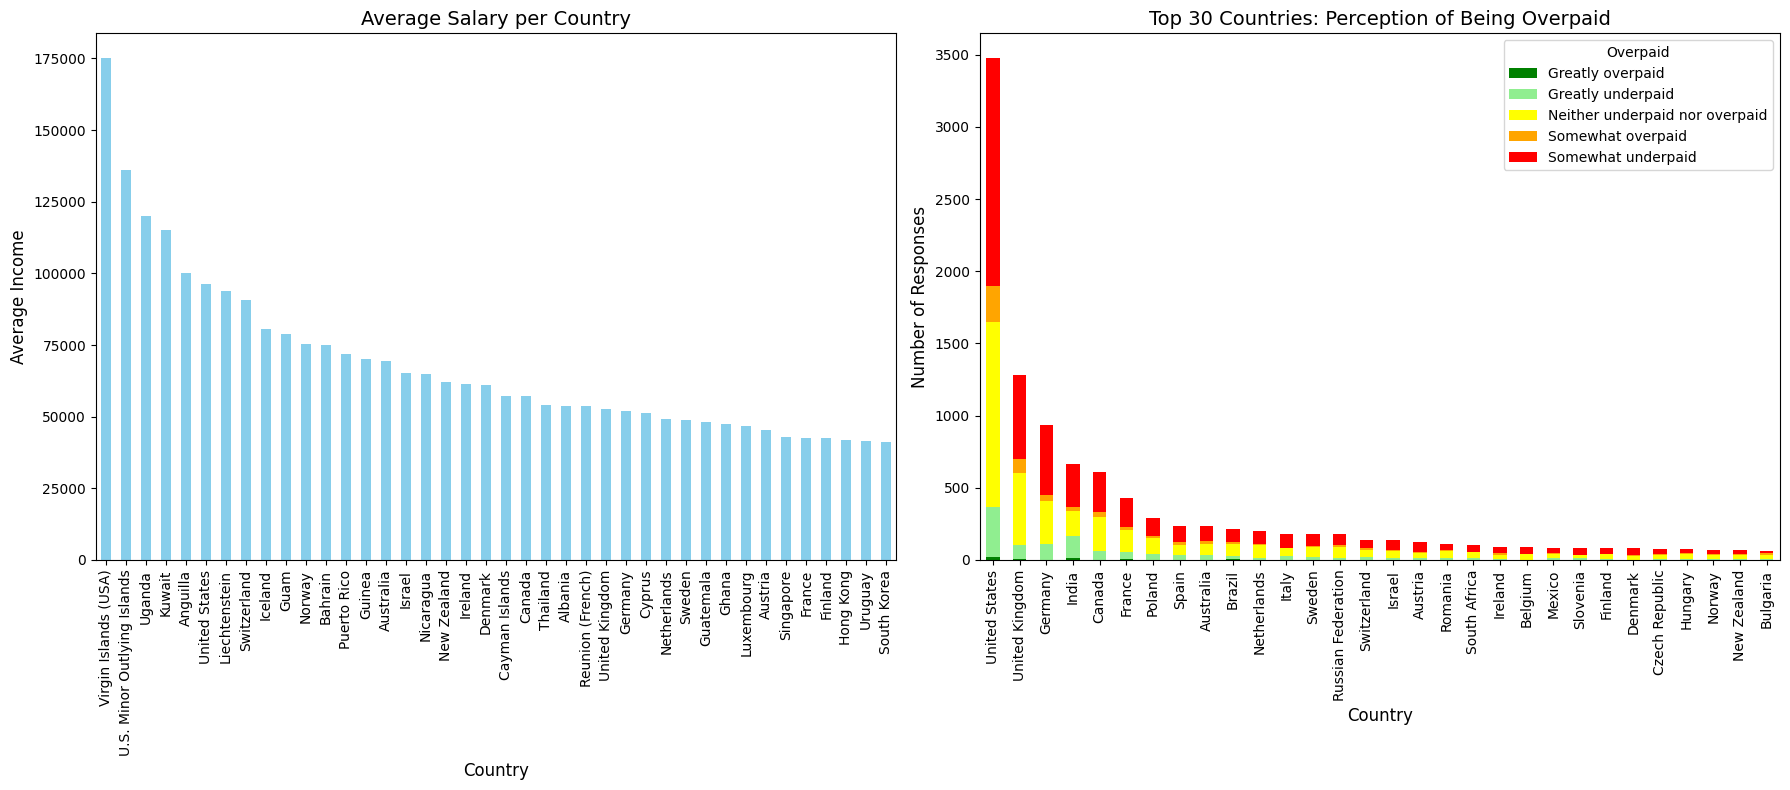

In [13]:
#calculate the average salary for every Country, i had to limit it to the top 40 cxountries else it could be possible the countries are not readable anymore
import matplotlib.pyplot as plt

# Calculate the average salary per country (Top 40)
country_salary_avg = df.groupby('Country')['Salary'].mean()
top_40_countries = country_salary_avg.sort_values(ascending=False).head(40)

# Count how many believe they are underpaid or not
overpaid_counts = df.groupby(['Country', 'Overpaid']).size().unstack(fill_value=0)
overpaid_counts['Total'] = overpaid_counts.sum(axis=1)

# Sort by total responses and select the top 30 countries
top_30_overpaid = overpaid_counts.sort_values(by='Total', ascending=False).head(30)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Average Salary per Country
top_40_countries.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Average Salary per Country', fontsize=14)
axes[0].set_xlabel('Country', fontsize=12)
axes[0].set_ylabel('Average Income', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Overpaid perception per Country (Stacked Bar Chart)
top_30_overpaid.drop(columns=['Total']).plot(kind='bar', stacked=True, color=['green', 'lightgreen', 'yellow', 'orange', 'red'], ax=axes[1])
axes[1].set_title('Top 30 Countries: Perception of Being Overpaid', fontsize=14)
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Number of Responses', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [14]:
#Interesting, even though the USA has the Highest Paygrades its also complaining about being severely underpaid
#ive set the two barcharts next to each other so it could be better analyzed, its much more pleasing for the consumer
# This is it for the Data Model i will now share my insights on my Blog